In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore') 


# Loading Train csv file

In [2]:
train=pd.read_csv(r"D:\New_files\Property_Price_Train.csv")


In [3]:
train.shape

(1459, 81)

In [4]:
#train

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

# Cleaning Train Data

In [6]:
train.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

# dectecting NaN values

In [7]:
missing_values=["NaN"]
train=pd.read_csv(r"D:\New_files\Property_Price_Train.csv",na_values=missing_values)


In [8]:
train.isnull().any()

Id                False
Building_Class    False
Zoning_Class      False
Lot_Extent         True
Lot_Size          False
                  ...  
Month_Sold        False
Year_Sold         False
Sale_Type         False
Sale_Condition    False
Sale_Price        False
Length: 81, dtype: bool

<AxesSubplot:>

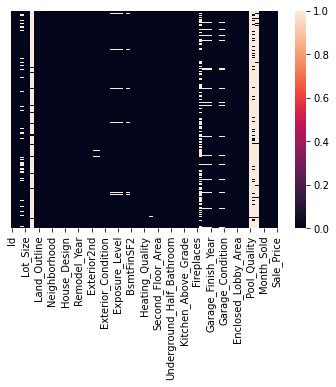

In [9]:
sns.heatmap(train.isnull(),yticklabels=False)

# removing NaN Values

In [10]:
train.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dropping Unwanted columns

In [11]:
drop_col=train.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality','Exterior1st','Exterior2nd','Condition1','Condition2','BsmtFinType1','BsmtFinType2','Garage_Finish_Year'], axis=1, inplace=True)
train.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
train.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# D-Type Conversion

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
train.select_dtypes(include=['float64']).columns 

Index(['Lot_Extent', 'Brick_Veneer_Area', 'Garage_Built_Year', 'Garage_Area',
       'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area'],
      dtype='object')

In [15]:
train.Lot_Extent=le.fit_transform(train.Lot_Extent)
train.Brick_Veneer_Area=le.fit_transform(train.Brick_Veneer_Area)
train.Garage_Built_Year=le.fit_transform(train.Garage_Built_Year)
train.Garage_Area=le.fit_transform(train.Garage_Area)
train.W_Deck_Area=le.fit_transform(train.W_Deck_Area)
train.Open_Lobby_Area=le.fit_transform(train.Open_Lobby_Area)
train.Enclosed_Lobby_Area=le.fit_transform(train.Enclosed_Lobby_Area)



In [16]:
train.select_dtypes(include=['object']).columns

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type',
       'Sale_Condition'],
      dtype='object')

In [17]:
train.Lot_Extent=le.fit_transform(train.Lot_Extent)
train.Zoning_Class=le.fit_transform(train.Zoning_Class)
train.Road_Type=le.fit_transform(train.Road_Type)
train.Property_Shape=le.fit_transform(train.Property_Shape)
train.Land_Outline=le.fit_transform(train.Land_Outline)
train.Utility_Type=le.fit_transform(train.Utility_Type)
train.Lot_Configuration=le.fit_transform(train.Lot_Configuration)
train.Property_Slope=le.fit_transform(train.Property_Slope)
train.Neighborhood=le.fit_transform(train.Neighborhood)
train.House_Type=le.fit_transform(train.House_Type)
train.House_Design=le.fit_transform(train.House_Design)
train.Roof_Design=le.fit_transform(train.Roof_Design)
train.Roof_Quality=le.fit_transform(train.Roof_Quality)
train.Brick_Veneer_Type=le.fit_transform(train.Brick_Veneer_Type)
train.Exterior_Material=le.fit_transform(train.Exterior_Material)
train.Exterior_Condition=le.fit_transform(train.Exterior_Condition)
train.Exposure_Level=le.fit_transform(train.Exposure_Level)
train.Heating_Type=le.fit_transform(train.Heating_Type)
train.Heating_Quality=le.fit_transform(train.Heating_Quality)
train.Air_Conditioning=le.fit_transform(train.Air_Conditioning)
train.Foundation_Type=le.fit_transform(train.Foundation_Type)
train.Basement_Height=le.fit_transform(train.Basement_Height)
train.Basement_Condition=le.fit_transform(train.Basement_Condition)
train.Electrical_System=le.fit_transform(train.Electrical_System)
train.Kitchen_Quality=le.fit_transform(train.Kitchen_Quality)
train.Functional_Rate=le.fit_transform(train.Functional_Rate)
train.Garage=le.fit_transform(train.Garage)
train.Garage_Quality=le.fit_transform(train.Garage_Quality)
train.Garage_Condition=le.fit_transform(train.Garage_Condition)
train.Pavedd_Drive=le.fit_transform(train.Pavedd_Drive)
train.Sale_Type=le.fit_transform(train.Sale_Type)
train.Sale_Condition=le.fit_transform(train.Sale_Condition)

In [18]:
train.dtypes

Id                int64
Building_Class    int64
Zoning_Class      int32
Lot_Extent        int64
Lot_Size          int64
                  ...  
Month_Sold        int64
Year_Sold         int64
Sale_Type         int32
Sale_Condition    int32
Sale_Price        int64
Length: 69, dtype: object

In [19]:
train.shape

(1459, 69)

In [20]:
#replacing nan value with the median
train['Lot_Extent'].fillna(("median"),inplace=True)
train['Garage_Built_Year'].fillna(("median"),inplace=True)
train['Brick_Veneer_Type'].fillna(("median"),inplace=True)
train['Brick_Veneer_Area'].fillna(("median"),inplace=True)
train['Basement_Height'].fillna(("median"),inplace=True)
train['Basement_Condition'].fillna(("median"),inplace=True)
train['Exposure_Level'].fillna(("median"),inplace=True)
train['Electrical_System'].fillna(("median"),inplace=True)
train['Garage'].fillna(("median"),inplace=True)
train['Garage_Quality'].fillna(("median"),inplace=True)
train['Garage_Condition'].fillna(("median"),inplace=True)




In [21]:
train.drop_duplicates(inplace=True)

In [22]:
#train.info()

In [23]:
#train.isnull().any()

In [24]:
train.isnull().sum()

Id                0
Building_Class    0
Zoning_Class      0
Lot_Extent        0
Lot_Size          0
                 ..
Month_Sold        0
Year_Sold         0
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Length: 69, dtype: int64

In [25]:
train

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,36,8450,1,3,3,0,4,...,688,0,0,0,0,2,2008,8,4,208500
1,2,20,3,51,9600,1,3,3,0,2,...,633,0,0,0,0,5,2007,8,4,181500
2,3,60,3,39,11250,1,0,3,0,4,...,191,0,0,0,0,9,2008,8,4,223500
3,4,70,3,31,9550,1,0,3,0,0,...,1048,0,0,0,0,2,2006,8,0,140000
4,5,60,3,55,14260,1,0,3,0,2,...,698,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,1,33,7500,1,3,3,0,4,...,1391,0,0,0,0,10,2009,8,4,185000
1455,1456,60,3,33,7917,1,3,3,0,4,...,1390,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,56,13175,1,3,3,0,4,...,1423,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,37,9042,1,3,3,0,4,...,979,0,0,0,2500,5,2010,8,4,266500


# Loading Test csv file

In [26]:
test=pd.read_csv(r"D:\New_files\Property_Price_Test.csv")

In [27]:
test.shape

(1459, 80)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [29]:
test

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal
1455,2916,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,AbnoRMDl
1456,2917,20,RLD,160.0,7367.775348,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RLD,62.0,2203.135444,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Cleaning Test Data

In [30]:
test.isnull().sum()

Id                       0
Building_Class           0
Zoning_Class             4
Lot_Extent             227
Lot_Size                 0
                      ... 
Miscellaneous_Value      0
Month_Sold               0
Year_Sold                0
Sale_Type                1
Sale_Condition           0
Length: 80, dtype: int64

In [31]:
test.isnull().any()

Id                     False
Building_Class         False
Zoning_Class            True
Lot_Extent              True
Lot_Size               False
                       ...  
Miscellaneous_Value    False
Month_Sold             False
Year_Sold              False
Sale_Type               True
Sale_Condition         False
Length: 80, dtype: bool

In [32]:
missing_values=["NaN"]
test=pd.read_csv(r"D:\New_files\Property_Price_Test.csv",na_values=missing_values)


<AxesSubplot:>

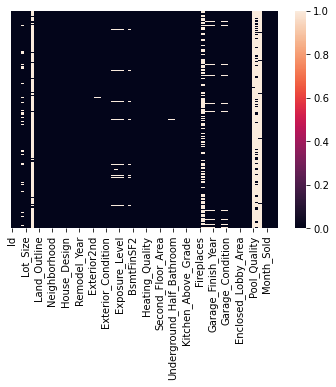

In [33]:
sns.heatmap(test.isnull(),yticklabels=False)


# removing NaN Values 

In [34]:
test.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
drop_col=test.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality','Exterior1st','Exterior2nd','Condition1','Condition2','BsmtFinType1','BsmtFinType2','Garage_Finish_Year',], axis=1, inplace=True)
test.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,Reg,Lvl,AllPub,I,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,IR1,Lvl,AllPub,C,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,IR1,Lvl,AllPub,I,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,IR1,Lvl,AllPub,I,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,IR1,HLS,AllPub,I,...,82,0,0,144,0,0,1,2010,WD,Normal


In [36]:
#test.info()

# D-Types Conversion

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
test.select_dtypes(include=['float64']).columns 

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area'],
      dtype='object')

In [39]:
test.Lot_Extent=le.fit_transform(test.Lot_Extent)
test.Brick_Veneer_Area=le.fit_transform(test.Brick_Veneer_Area)
test.Garage_Built_Year=le.fit_transform(test.Garage_Built_Year)
test.Garage_Area=le.fit_transform(test.Garage_Area)
test.W_Deck_Area=le.fit_transform(test.W_Deck_Area)
test.Open_Lobby_Area=le.fit_transform(test.Open_Lobby_Area)
test.Enclosed_Lobby_Area=le.fit_transform(test.Enclosed_Lobby_Area)

In [40]:
test.select_dtypes(include=['object']).columns 

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type',
       'Sale_Condition'],
      dtype='object')

In [41]:
test.Zoning_Class=le.fit_transform(test.Zoning_Class)
test.Road_Type=le.fit_transform(test.Road_Type)
test.Property_Shape=le.fit_transform(test.Property_Shape)
test.Land_Outline=le.fit_transform(test.Land_Outline)
test.Utility_Type=le.fit_transform(test.Utility_Type)
test.Lot_Configuration=le.fit_transform(test.Lot_Configuration)
test.Property_Slope=le.fit_transform(test.Property_Slope)
test.Neighborhood=le.fit_transform(test.Neighborhood)
test.House_Type=le.fit_transform(test.House_Type)
test.House_Design=le.fit_transform(test.House_Design)
test.Roof_Design=le.fit_transform(test.Roof_Design)
test.Roof_Quality=le.fit_transform(test.Roof_Quality)
test.Brick_Veneer_Type=le.fit_transform(test.Brick_Veneer_Type)
test.Exterior_Material=le.fit_transform(test.Exterior_Material)
test.Exterior_Condition=le.fit_transform(test.Exterior_Condition)
test.Exposure_Level=le.fit_transform(test.Exposure_Level)
test.Heating_Type=le.fit_transform(test.Heating_Type)
test.Heating_Quality=le.fit_transform(test.Heating_Quality)
test.Air_Conditioning=le.fit_transform(test.Air_Conditioning)
test.Foundation_Type=le.fit_transform(test.Foundation_Type)
test.Basement_Height=le.fit_transform(test.Basement_Height)
test.Basement_Condition=le.fit_transform(test.Basement_Condition)
test.Electrical_System=le.fit_transform(test.Electrical_System)
test.Kitchen_Quality=le.fit_transform(test.Kitchen_Quality)
test.Functional_Rate=le.fit_transform(test.Functional_Rate)
test.Garage=le.fit_transform(test.Garage)
test.Garage_Quality=le.fit_transform(test.Garage_Quality)
test.Garage_Condition=le.fit_transform(test.Garage_Condition)
test.Pavedd_Drive=le.fit_transform(test.Pavedd_Drive)
test.Sale_Type=le.fit_transform(test.Sale_Type)
test.Sale_Condition=le.fit_transform(test.Sale_Condition)

In [42]:
test.dtypes

Id                       int64
Building_Class           int64
Zoning_Class             int32
Lot_Extent               int64
Lot_Size               float64
                        ...   
Miscellaneous_Value      int64
Month_Sold               int64
Year_Sold                int64
Sale_Type                int32
Sale_Condition           int32
Length: 68, dtype: object

In [43]:
test.shape

(1459, 68)

In [44]:
#replacing nan value with the median
test['Lot_Extent'].fillna(("median"),inplace=True)
test['Zoning_Class'].fillna(("median"),inplace=True)
test['Utility_Type'].fillna(("median"),inplace=True)
test['Brick_Veneer_Type'].fillna(("median"),inplace=True)
test['Brick_Veneer_Area'].fillna(("median"),inplace=True)
test['Basement_Height'].fillna(("median"),inplace=True)
test['Basement_Condition'].fillna(("median"),inplace=True)
test['Exposure_Level'].fillna(("median"),inplace=True)
test['Garage'].fillna(("median"),inplace=True)
test['Garage_Quality'].fillna(("median"),inplace=True)
test['Garage_Built_Year'].fillna(("median"),inplace=True)


In [45]:
test.drop_duplicates(inplace=True)

In [46]:
test.shape

(1459, 68)

In [47]:
#test.info()

In [48]:
test

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,2,56,16104.819760,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,6
1,1462,20,3,57,15639.150810,1,0,3,0,0,...,24,0,0,0,0,12500,6,2010,8,6
2,1463,60,3,50,3849.428920,1,0,3,0,4,...,22,0,0,0,0,0,3,2010,8,6
3,1464,60,3,54,4955.447942,1,0,3,0,4,...,24,0,0,0,0,0,6,2010,8,6
4,1465,120,3,19,3046.604942,1,0,1,0,4,...,68,0,0,144,0,0,1,2010,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,0,14584.838440,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,5
1455,2916,160,4,0,8072.991379,1,3,3,0,4,...,12,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,112,7367.775348,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,1
1457,2918,85,3,38,2203.135444,1,3,3,0,4,...,20,0,0,0,0,700,7,2006,8,6


In [49]:
test.isnull().sum()

Id                     0
Building_Class         0
Zoning_Class           0
Lot_Extent             0
Lot_Size               0
                      ..
Miscellaneous_Value    0
Month_Sold             0
Year_Sold              0
Sale_Type              0
Sale_Condition         0
Length: 68, dtype: int64

In [50]:
#test.isnull().any()

In [51]:
test

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,2,56,16104.819760,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,6
1,1462,20,3,57,15639.150810,1,0,3,0,0,...,24,0,0,0,0,12500,6,2010,8,6
2,1463,60,3,50,3849.428920,1,0,3,0,4,...,22,0,0,0,0,0,3,2010,8,6
3,1464,60,3,54,4955.447942,1,0,3,0,4,...,24,0,0,0,0,0,6,2010,8,6
4,1465,120,3,19,3046.604942,1,0,1,0,4,...,68,0,0,144,0,0,1,2010,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,0,14584.838440,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,5
1455,2916,160,4,0,8072.991379,1,3,3,0,4,...,12,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,112,7367.775348,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,1
1457,2918,85,3,38,2203.135444,1,3,3,0,4,...,20,0,0,0,0,700,7,2006,8,6


## Visualization

In [52]:
data=train.corr()
data

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,1.000000,0.012207,-0.006048,0.000738,-0.033191,0.008849,0.031270,-0.020053,0.013369,0.049095,...,-0.027162,-0.046545,0.001653,0.057184,-0.006145,0.021336,0.000548,0.019422,-0.006059,-0.021441
Building_Class,0.012207,1.000000,0.035882,-0.233365,-0.139852,-0.024937,0.119793,-0.002752,-0.022865,0.076301,...,0.031437,-0.043906,-0.026199,0.008244,-0.007738,-0.013660,-0.021330,0.012656,-0.024822,-0.084563
Zoning_Class,-0.006048,0.035882,1.000000,-0.084300,-0.034453,0.087656,0.061923,-0.017845,-0.001193,-0.009877,...,-0.007094,0.000359,0.019081,-0.003130,0.009290,-0.031500,-0.020623,0.097450,0.009500,-0.166896
Lot_Extent,0.000738,-0.233365,-0.084300,1.000000,0.261663,-0.023532,-0.356086,0.000440,0.046062,-0.259748,...,-0.027718,0.058413,0.028680,0.062353,0.065088,-0.005936,0.021644,0.005389,0.017897,0.213776
Lot_Size,-0.033191,-0.139852,-0.034453,0.261663,1.000000,-0.197129,-0.165317,-0.149076,0.010122,-0.121152,...,0.008813,0.020418,0.043151,0.077670,0.038064,0.001200,-0.014256,0.012305,0.034178,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month_Sold,0.021336,-0.013660,-0.031500,-0.005936,0.001200,0.003695,-0.033400,-0.011573,-0.051554,0.018954,...,-0.026383,0.029465,0.023196,-0.033742,-0.006502,1.000000,-0.145712,-0.047362,0.013338,0.046401
Year_Sold,0.000548,-0.021330,-0.020623,0.021644,-0.014256,-0.025050,0.036384,0.020478,0.023355,-0.006051,...,-0.020142,0.018656,0.010720,-0.059683,0.004915,-0.145712,1.000000,-0.002357,0.003861,-0.028884
Sale_Type,0.019422,0.012656,0.097450,0.005389,0.012305,0.014326,-0.001073,-0.025823,-0.126768,0.014197,...,-0.032021,-0.009010,0.004591,0.011024,0.015793,-0.047362,-0.002357,1.000000,0.184031,-0.054826
Sale_Condition,-0.006059,-0.024822,0.009500,0.017897,0.034178,0.006055,-0.038234,0.033766,-0.089698,0.051500,...,-0.005415,0.004396,-0.020057,-0.067243,0.013040,0.013338,0.003861,0.184031,1.000000,0.213168


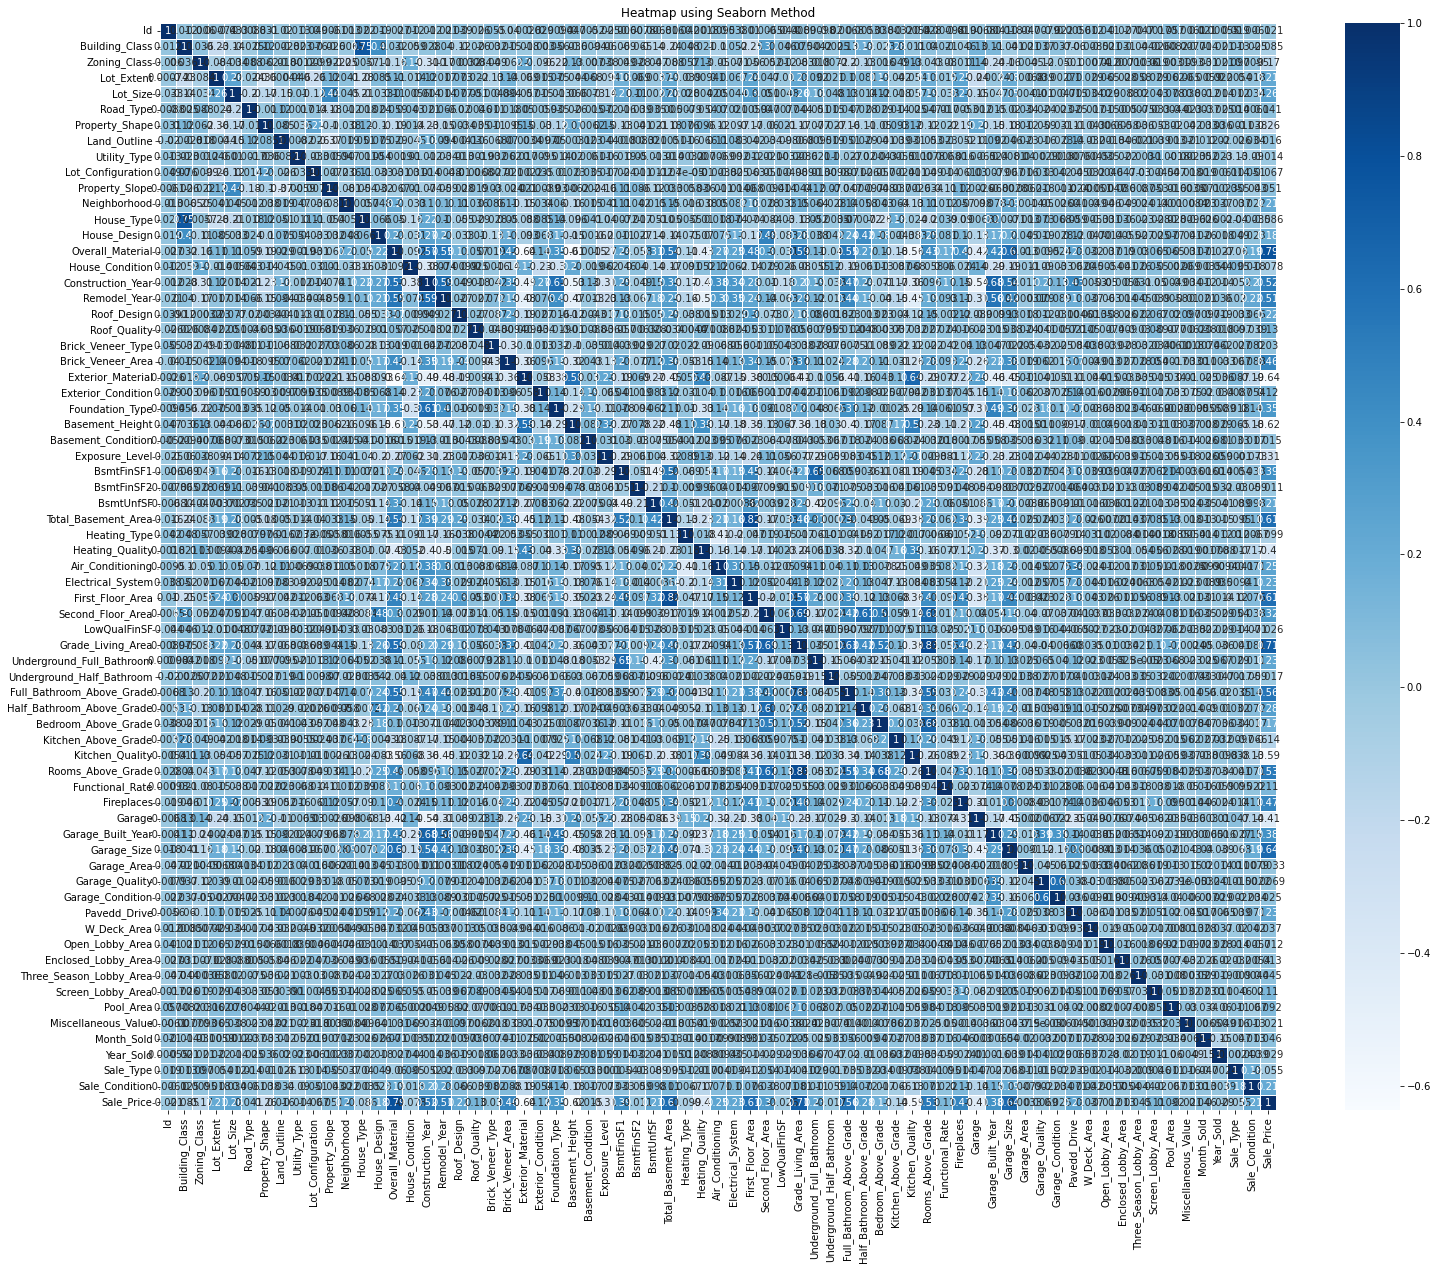

In [53]:
plt.figure(figsize=(25,20))
heatmap=sns.heatmap(data,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

<AxesSubplot:xlabel='Year_Sold', ylabel='count'>

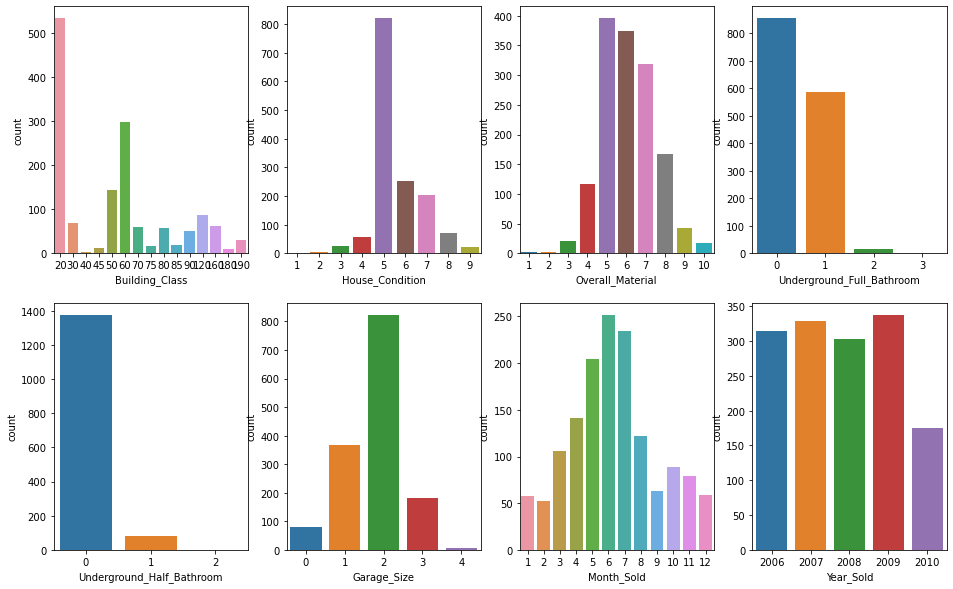

In [54]:
## doing visualization and plots.     
fig,ax = plt.subplots(2,4,figsize =(16,10))

sns.countplot("Building_Class",data=train,ax=ax[0][0])
sns.countplot("House_Condition",data=train,ax=ax[0][1])
sns.countplot("Overall_Material",data=train,ax=ax[0][2])
sns.countplot("Underground_Full_Bathroom",data=train,ax=ax[0][3])
sns.countplot("Underground_Half_Bathroom",data=train,ax=ax[1][0])
sns.countplot("Garage_Size",data=train,ax=ax[1][1])
sns.countplot("Month_Sold",data=train,ax=ax[1][2])
sns.countplot("Year_Sold",data=train,ax=ax[1][3])

<AxesSubplot:xlabel='Construction_Year', ylabel='count'>

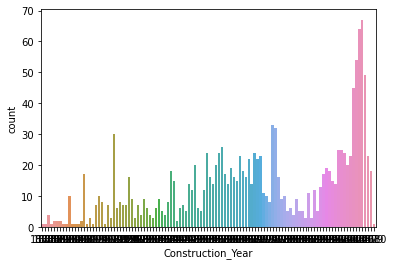

In [55]:
sns.countplot("Construction_Year",data=train)

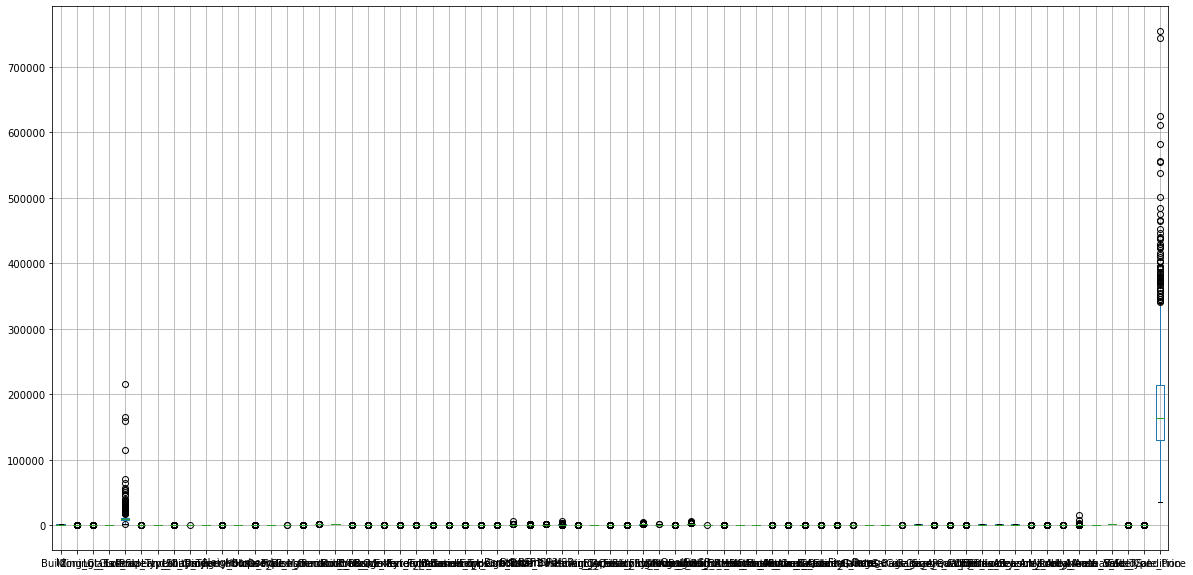

In [56]:
train.boxplot(figsize=(20,10))
plt.show()

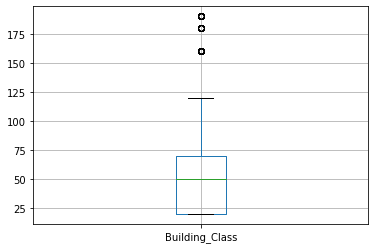

In [118]:
figure=train.boxplot(column="Building_Class") 

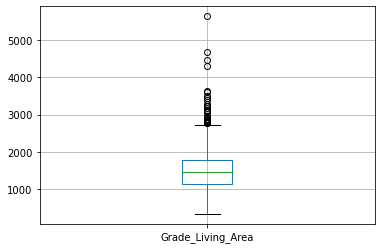

In [119]:
figure=train.boxplot(column="Grade_Living_Area") 

In [59]:
#figure=train.boxplot(column="Construction_Year") 

<AxesSubplot:>

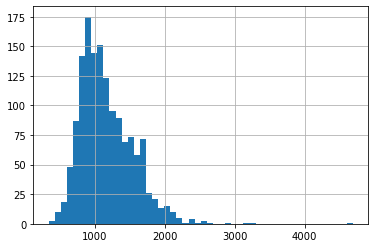

In [60]:
train.First_Floor_Area.hist(bins=50)

<AxesSubplot:>

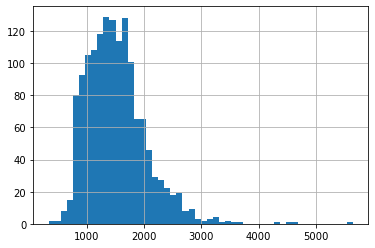

In [236]:
train.Grade_Living_Area.hist(bins=50)

<AxesSubplot:>

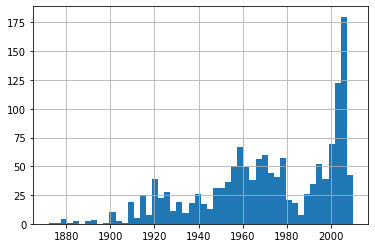

In [237]:
train.Construction_Year.hist(bins=50)

In [63]:
train["First_Floor_Area"].describe()

count    1459.000000
mean     1162.562714
std       386.712553
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.500000
max      4692.000000
Name: First_Floor_Area, dtype: float64

In [64]:
upper_boundary=train["First_Floor_Area"].mean()+3*train["First_Floor_Area"].std()
lower_boundary=train["First_Floor_Area"].mean()-3*train["First_Floor_Area"].std()
print(lower_boundary),print(upper_boundary),print(train["First_Floor_Area"].mean())

2.4250547004389773
2322.700373675161
1162.5627141877999


(None, None, None)

In [65]:
df=train.copy()

<AxesSubplot:>

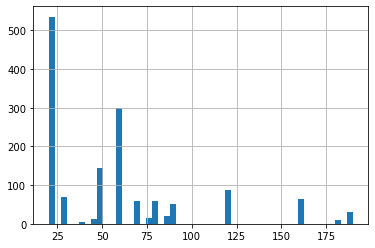

In [120]:
df.Building_Class.hist(bins=50)

In [67]:
#df.Construction_Year.hist(bins=50)

In [68]:
#df.Grade_Living_Area.hist(bins=50)

# Building model on train data and - prediction test

In [69]:
train.shape,test.shape

((1459, 69), (1459, 68))

In [70]:
df_x=train.iloc[:,1:-1]#ind var
df_y=train.iloc[:,-1]#target
test_x=test.iloc[:,1:]

In [71]:
df_x.shape,df_y.shape,test_x.shape

((1459, 67), (1459,), (1459, 67))

In [72]:
import sklearn
from sklearn.model_selection import train_test_split

In [73]:
df_x_train,df_x_test,df_y_train,df_y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=50)

In [74]:
df_x_train.shape,df_x_test.shape,df_y_train.shape,df_y_test.shape

((1167, 67), (292, 67), (1167,), (292,))

In [75]:
from sklearn  import linear_model
lin=linear_model.LinearRegression()

In [76]:
lin.fit(df_x,df_y)

LinearRegression()

In [77]:
l_p1=lin.predict(df_x_test)
#l_p1

In [78]:
lin.intercept_

1034958.2476343365

In [79]:
lin.coef_

array([-1.08368622e+02, -1.15897898e+03, -2.07846307e+01,  3.45647430e-01,
        3.33362234e+04, -1.12658127e+03,  3.79595958e+03, -4.41639224e+04,
       -2.36771898e+02,  8.57976588e+03,  4.25019768e+02, -1.50317715e+03,
       -1.29299700e+03,  1.08689766e+04,  5.29734229e+03,  2.08945685e+02,
        1.92519169e+01,  2.19502516e+03,  2.69912056e+04,  2.83833581e+03,
        4.12738285e+01, -9.00535526e+03,  6.01745529e+02,  2.49562659e+03,
       -8.26000740e+03,  2.89156546e+03, -3.76212080e+03,  8.15431550e+00,
        5.62429435e+00, -5.17444376e+00,  8.60416594e+00, -1.72973455e+03,
       -8.65523775e+02, -5.02151074e+02, -9.05941279e+02,  2.15714881e+01,
        2.32112234e+01, -2.12500980e+01,  2.35326134e+01,  5.29214100e+03,
       -3.76149691e+02,  3.27674696e+03, -8.69882825e+02, -3.37605407e+03,
       -1.14782768e+04, -8.40258282e+03,  3.26451625e+03,  2.15915107e+03,
        6.23744697e+03,  1.02873641e+03, -9.43798781e+00,  1.05241117e+04,
        4.88972915e-01,  

In [80]:
R2=lin.score(df_x_train,df_y_train)
R2

0.8420148340789118

In [81]:
adj_R2=1-(((1-R2)*(1459-1))/(1459-67-1))
adj_R2

0.8344051963242656

In [82]:
from sklearn import metrics

In [83]:
df_mae=metrics.mean_absolute_error(df_y_test,l_p1)
df_mae

18799.195508760095

In [84]:
df_mse=metrics.mean_squared_error(df_y_test,l_p1)
df_mse

636816336.4932492

In [85]:
df_rmse=np.sqrt(df_mse)
df_rmse

25235.220159397246

In [86]:
error=df_y_test-l_p1
error

672    -19208.715886
530    -18367.019209
1421    -3272.539946
1372    17848.643222
305     24416.229683
            ...     
453      2018.860398
1310    50301.917139
190     45494.663574
1237   -26841.135917
642     21614.318265
Name: Sale_Price, Length: 292, dtype: float64

In [87]:
error_abs=np.absolute(error)
error_abs

672     19208.715886
530     18367.019209
1421     3272.539946
1372    17848.643222
305     24416.229683
            ...     
453      2018.860398
1310    50301.917139
190     45494.663574
1237    26841.135917
642     21614.318265
Name: Sale_Price, Length: 292, dtype: float64

In [88]:
df_mape=np.mean(error_abs/df_y_test)*100
df_mape

11.030898199190682

In [89]:
df_acc1=100-df_mape
df_acc1

88.96910180080931

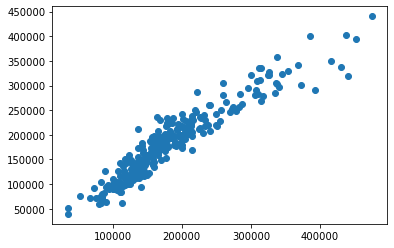

In [90]:
plt.scatter(df_y_test,l_p1)

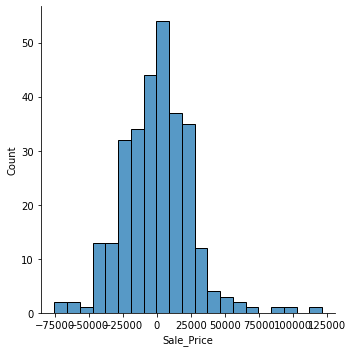

In [91]:
sns.displot(df_y_test-l_p1)

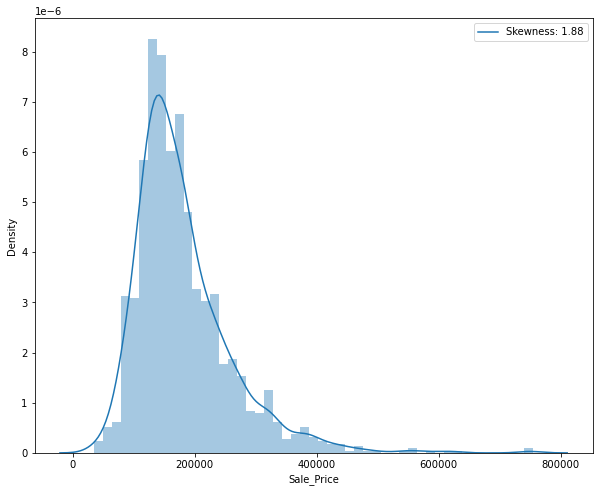

In [92]:
plt.figure(figsize=(10,8))
bar = sns.distplot(train["Sale_Price"])
bar.legend(["Skewness: {:.2f}".format(train['Sale_Price'].skew())])

# Lasso (L1) 

In [93]:
from sklearn.linear_model import Lasso
lo=Lasso()

In [94]:
lo.fit(df_x_train,df_y_train)

Lasso()

In [95]:
lo_p=lo.predict(df_x_test)
#lo_p

In [96]:
lo.intercept_

2032575.0354054426

In [97]:
lo.coef_

array([-1.11831679e+02, -1.71147109e+03, -3.20803235e+01,  3.08538623e-01,
        3.50637634e+04, -1.30473921e+03,  3.86192972e+03, -4.43897211e+04,
       -3.43497466e+02,  9.66920721e+03,  5.87879130e+02, -1.86714097e+03,
       -1.75284719e+03,  1.09434582e+04,  6.10379703e+03,  2.05510120e+02,
        1.28837279e+01,  2.40233676e+03,  2.99464431e+04,  3.02707278e+03,
        4.75775030e+01, -9.34639275e+03,  5.31031753e+02,  3.91362867e+03,
       -8.69134495e+03,  2.72546242e+03, -4.99064989e+03,  1.27058772e+01,
        1.43467929e+01,  7.37106078e-01,  7.15392594e-01, -2.26494113e+02,
       -5.83425687e+02, -6.26551880e+02, -1.14706078e+03,  3.34823859e+01,
        4.04850790e+01, -1.79023393e+01,  4.23796622e+00,  7.09003668e+03,
       -2.02899574e+03,  4.02030633e+03, -1.23950417e+03, -3.45685919e+03,
       -1.33087865e+04, -8.17553567e+03,  4.04458325e+03,  1.64607835e+03,
        7.34903283e+03,  7.86817070e+02, -2.58719520e+01,  1.12258053e+04,
        1.36313756e+00,  

In [98]:
lo_R2=lo.score(df_x_train,df_y_train)
lo_R2

0.8437245845193306

In [99]:
lo_Adj_R2=1-(((1-lo_R2)*(1459-1))/(1459-67-1))
lo_Adj_R2

0.8361972999490899

In [100]:
df_1=pd.DataFrame({"Coefficient":list(lo.coef_),"Columns":list(df_x)})
df_1

,Coefficient,Columns
0,-111.831679,Building_Class
1,-1711.471087,Zoning_Class
2,-32.080323,Lot_Extent
3,0.308539,Lot_Size
4,35063.763422,Road_Type
...,...,...
62,-0.950522,Miscellaneous_Value
63,-325.670686,Month_Sold
64,-1308.430408,Year_Sold
65,-584.718244,Sale_Type


In [101]:
from sklearn import metrics

In [102]:
lo_mae=metrics.mean_absolute_error(df_y_test,lo_p)
lo_mae

20384.91338095195

In [103]:
lo_mse=metrics.mean_squared_error(df_y_test,lo_p)
lo_mse

737763571.6258242

In [104]:
lo_rmse=np.sqrt(lo_mse)
lo_rmse

27161.803541477584

In [105]:
lo_error=df_y_test-lo_p
#lo_error

In [106]:
lo_error_abs=np.absolute(lo_error)
#lo_error_abs

In [107]:
lo_mape=np.mean(lo_error_abs/df_y_test)*100
lo_mape

12.094505299121204

In [108]:
lo_acc1=100-lo_mape
lo_acc1

87.90549470087879

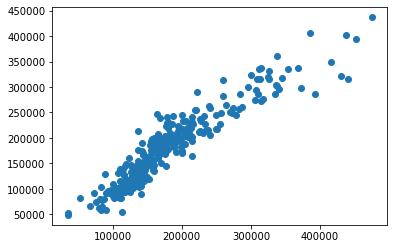

In [109]:
plt.scatter(df_y_test,lo_p)

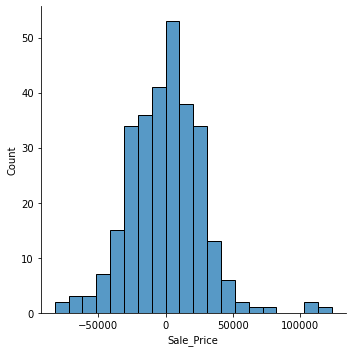

In [110]:
sns.displot(df_y_test-lo_p)

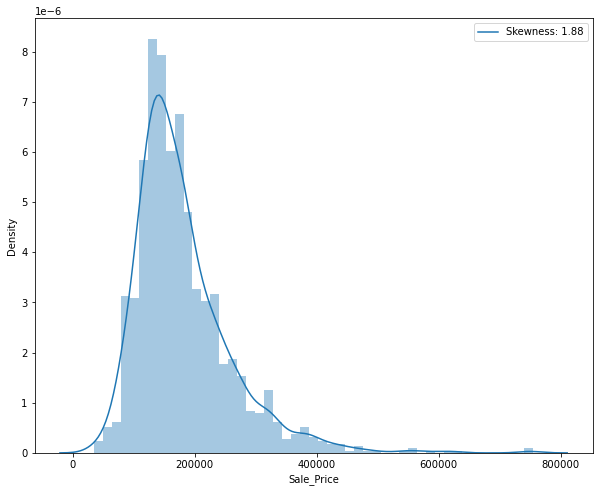

In [111]:
plt.figure(figsize=(10,8))
bar = sns.distplot(train["Sale_Price"])
bar.legend(["Skewness: {:.2f}".format(train['Sale_Price'].skew())])

In [112]:
l1=["Linear","Lasso"]

In [113]:
l2=[R2,lo_R2]

In [114]:
l3=[adj_R2,lo_Adj_R2]

In [115]:
l4=[df_mse,lo_mse]

In [116]:
final_df=pd.DataFrame({"Model_Name":l1,"R_Square":l2,"Adj_R2":l3,"Mse":l4})

In [117]:
final_df

,Model_Name,R_Square,Adj_R2,Mse
0,Linear,0.842015,0.834405,6.368163e+08
1,Lasso,0.843725,0.836197,7.377636e+08
